## 데이터 전처리
- 제목에 직군 이름 혹은 관련 내용이 들어간 경우만 추출
- 정규직, 인턴, 계약직, 프리랜서 타입만 추출
- 날짜 제거
- 중복 제거
- 서울, 경기, 충북, 강원 등 앞 부분만 추출

In [5]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('crawling_job_all.csv')
df[20:25]

,company,title,url,loc,exp,job_name
20,호전실업,"<span>데이터</span> <span>분석</span>, AI엔지니어 채용 (8...",https://jumpit.saramin.co.kr/position/39187,서울 마포구,경력 8~10년,데이터 분석
21,호전실업,"<span>데이터</span> <span>분석</span>, AI엔지니어 채용 (4...",https://jumpit.saramin.co.kr/position/39186,서울 마포구,경력 4~7년,데이터 분석
22,로이드케이,빅<span>데이터</span> 솔루션 <span>데이터</span> 엔지니어(경력...,https://jumpit.saramin.co.kr/position/38294,경기 성남시,경력 5~13년,데이터 분석
23,알티엠,<span>데이터</span> 사이언티스트 (시계열),https://jumpit.saramin.co.kr/position/38037,서울 강남구,경력 3~10년,데이터 분석
24,다큐브,<span>데이터</span> 사이언티스트(DS),https://jumpit.saramin.co.kr/position/38932,서울 영등포구,경력 1~10년,데이터 분석


#### span 제거

In [6]:
df_ttl = df.copy()

df_ttl['title'] = df_ttl['title'].map(lambda x: re.sub(r'</?span>', '', x))

df_ttl.head()

,company,title,url,loc,exp,job_name
0,부동산플래닛,[데이터분석가] Data Analyst,https://jumpit.saramin.co.kr/position/38267,서울 강남구,신입~20년,데이터 분석
1,주식회사 세계입찰,데이터분석가 신입 채용,https://jumpit.saramin.co.kr/position/38636,경기 부천시,신입,데이터 분석
2,주식회사 세계입찰,데이터분석가 경력 채용,https://jumpit.saramin.co.kr/position/38602,경기 부천시,경력 5~20년,데이터 분석
3,넛지헬스케어,[캐시워크] 데이터분석 담당 (석사/박사),https://jumpit.saramin.co.kr/position/37816,서울 강남구,신입~10년,데이터 분석
4,페니로이스,Data Scientist in Financial 경력직 채용(6~10년),https://jumpit.saramin.co.kr/position/39282,서울 종로구,경력 6~10년,데이터 분석


#### 제목에 직군 이름이 들어간 경우만

In [7]:
df_lower = df_ttl.copy()

df_lower['title'] = df_lower['title'].str.lower()
df_lower.head(10)

,company,title,url,loc,exp,job_name
0,부동산플래닛,[데이터분석가] data analyst,https://jumpit.saramin.co.kr/position/38267,서울 강남구,신입~20년,데이터 분석
1,주식회사 세계입찰,데이터분석가 신입 채용,https://jumpit.saramin.co.kr/position/38636,경기 부천시,신입,데이터 분석
2,주식회사 세계입찰,데이터분석가 경력 채용,https://jumpit.saramin.co.kr/position/38602,경기 부천시,경력 5~20년,데이터 분석
3,넛지헬스케어,[캐시워크] 데이터분석 담당 (석사/박사),https://jumpit.saramin.co.kr/position/37816,서울 강남구,신입~10년,데이터 분석
4,페니로이스,data scientist in financial 경력직 채용(6~10년),https://jumpit.saramin.co.kr/position/39282,서울 종로구,경력 6~10년,데이터 분석
5,페니로이스,data scientist in financial 경력직 채용(2~5년),https://jumpit.saramin.co.kr/position/39281,서울 종로구,경력 2~5년,데이터 분석
6,골든플래닛,클라우드 엔지니어(팀장급 채용),https://jumpit.saramin.co.kr/position/38133,서울 강남구,신입,데이터 분석
7,넛지헬스케어,[병역특례] 데이터분석 담당 산업기능요원 모집,https://jumpit.saramin.co.kr/position/37814,서울 강남구,신입~2년,데이터 분석
8,라이앤캐처스,[추천엔지니어 ml]추천엔지니어(경력) 모집,https://jumpit.saramin.co.kr/position/37561,서울 영등포구,경력 5~10년,데이터 분석
9,(주)데이터누리,데이터 분석가,https://jumpit.saramin.co.kr/position/38408,서울 강서구,경력 5~10년,데이터 분석


In [8]:
def check_keywords(row, keywords):
    for keyword_group in keywords:
        if all(keyword in row for keyword in keyword_group):
            return True
    return False

In [9]:
da_with = [
    ['데이터', '분석'],    
    ['data', 'analyst'],  
    ['db', '분석'],      
    ['데이터', '애널리스트'],
    ['buisness', 'analyst'],
    ['analyst'],   
    ['분석'],     
    ['데이터 분석'], 
    ['data analyst'] 
]

In [10]:
filt = df_lower[df_lower['job_name'] == '데이터 분석']

da = filt[filt['title'].apply(lambda x: check_keywords(x, da_with))]
da.head()

,company,title,url,loc,exp,job_name
0,부동산플래닛,[데이터분석가] data analyst,https://jumpit.saramin.co.kr/position/38267,서울 강남구,신입~20년,데이터 분석
1,주식회사 세계입찰,데이터분석가 신입 채용,https://jumpit.saramin.co.kr/position/38636,경기 부천시,신입,데이터 분석
2,주식회사 세계입찰,데이터분석가 경력 채용,https://jumpit.saramin.co.kr/position/38602,경기 부천시,경력 5~20년,데이터 분석
3,넛지헬스케어,[캐시워크] 데이터분석 담당 (석사/박사),https://jumpit.saramin.co.kr/position/37816,서울 강남구,신입~10년,데이터 분석
7,넛지헬스케어,[병역특례] 데이터분석 담당 산업기능요원 모집,https://jumpit.saramin.co.kr/position/37814,서울 강남구,신입~2년,데이터 분석


In [11]:
de_with = [
    ['데이터', '엔지니어'],    
    ['data', 'engineer'],  
    ['db', '엔지니어'],      
    ['db', 'engineer']
]

In [12]:
filt = df_lower[df_lower['job_name'] == '데이터 엔지니어']

de = filt[filt['title'].apply(lambda x: check_keywords(x, de_with))]
de.head()

,company,title,url,loc,exp,job_name
176,엔미디어플랫폼,데이터엔지니어 인재모집,https://jumpit.saramin.co.kr/position/38573,서울 송파구,경력 5~12년,데이터 엔지니어
177,워트인텔리전스,데이터 엔지니어 (8년 이상),https://jumpit.saramin.co.kr/position/37991,서울 서초구,경력 8~12년,데이터 엔지니어
178,로이드케이,빅데이터 솔루션 데이터 엔지니어(경력) 채용,https://jumpit.saramin.co.kr/position/38294,경기 성남시,경력 5~13년,데이터 엔지니어
179,알스퀘어,데이터 엔지니어,https://jumpit.saramin.co.kr/position/39493,서울 강남구,경력 5~15년,데이터 엔지니어
180,워트인텔리전스,데이터 엔지니어 (3년 이상),https://jumpit.saramin.co.kr/position/37990,서울 서초구,경력 3~5년,데이터 엔지니어


In [13]:
ai_with = [
    ['a', 'i', '개발'],
    ['인공지능', '개발'],
    ['a', 'i', '엔지니어'],
    ['a', 'i', 'engineer'],
    ['a', 'i', '연구'],
    ['a', 'i', 'architect'],
    ['딥', '러닝'],
    ['deep', 'learning'],
    ['machine', 'learning'],
    ['a', 'i', 'researcher'],
    ['a', 'i', 'solution'], 
    ['a', 'i', '전문가']
]

In [14]:
filt = df_lower[df_lower['job_name'] == 'AI 개발자']

ai = filt[filt['title'].apply(lambda x: check_keywords(x, ai_with))]
ai.head()

,company,title,url,loc,exp,job_name
352,엔티엘헬스케어,ai개발자 연구원 신입 채용,https://jumpit.saramin.co.kr/position/37322,경기 성남시,신입,AI 개발자
353,웅진,ai개발자 채용,https://jumpit.saramin.co.kr/position/37244,서울 중구,경력 3~20년,AI 개발자
354,피피에스(주),ai개발자,https://jumpit.saramin.co.kr/position/39366,서울 광진구,경력 1년,AI 개발자
355,(주)에이아이세스,ai 개발자 (지식기반 ai 챗봇) 시니어급 채용,https://jumpit.saramin.co.kr/position/39432,경기 성남시,경력 5~10년,AI 개발자
356,(주)에이아이세스,ai 개발자 (지식기반 ai 챗봇) 주니어급 채용,https://jumpit.saramin.co.kr/position/39431,경기 성남시,신입~5년,AI 개발자


In [15]:
cb_with = [
    ['챗봇', '개발'],
    ['a', 'i', '개발'],
    ['llm', '개발'],
    ['react', '개발'], 
    ['프론트', '개발']
]

In [16]:
filt = df_lower[df_lower['job_name'] == '챗봇 개발자']

cb = filt[filt['title'].apply(lambda x: check_keywords(x, cb_with))]
cb.head()

,company,title,url,loc,exp,job_name
528,피피에스(주),ai개발자,https://jumpit.saramin.co.kr/position/39366,서울 광진구,경력 1년,챗봇 개발자
529,(주)에이아이세스,ai 개발자 (지식기반 ai 챗봇) 시니어급 채용,https://jumpit.saramin.co.kr/position/39432,경기 성남시,경력 5~10년,챗봇 개발자
530,(주)에이아이세스,ai 개발자 (지식기반 ai 챗봇) 주니어급 채용,https://jumpit.saramin.co.kr/position/39431,경기 성남시,신입~5년,챗봇 개발자
531,비즈톡,카카오톡 상담톡 및 챗봇 서비스 개발자,https://jumpit.saramin.co.kr/position/37883,서울 강남구,경력 5~10년,챗봇 개발자
532,웅진,ai개발자 채용,https://jumpit.saramin.co.kr/position/37244,서울 중구,경력 3~20년,챗봇 개발자


In [17]:
cld_with = [
    ['클라우드', '엔지니어'],
    ['cloud', 'engineer'],
    ['cloud', '엔지니어'],
    ['클라우드', 'engineer'],
    ['cloud', 'architect'],
    ['클라우드', '아키텍트'],
    ['클라우드', '운영'],
    ['시스템', '엔지니어'],
    ['클라우드', '개발'],
    ['cloud', '개발'],
    ['서버', '엔지니어'],
    ['네트워크', '엔지니어'],
    ['network', '엔지니어'],
    ['네트워크', 'engineer'],
    ['인프라', '엔지니어'],
    ['cloud', 'sa']
]

In [18]:
filt = df_lower[df_lower['job_name'] == '클라우드 엔지니어']

cld = filt[filt['title'].apply(lambda x: check_keywords(x, cld_with))]
cld.head()

,company,title,url,loc,exp,job_name
545,빗썸코리아,클라우드엔지니어 - aws 서비스 운영,https://jumpit.saramin.co.kr/position/39296,서울 강남구,경력 5~10년,클라우드 엔지니어
546,골든플래닛,클라우드 엔지니어(팀장급 채용),https://jumpit.saramin.co.kr/position/38133,서울 강남구,신입,클라우드 엔지니어
547,빗썸코리아,블록체인 클라우드 엔지니어 (시니어),https://jumpit.saramin.co.kr/position/37616,서울 강남구,경력 8~12년,클라우드 엔지니어
548,빗썸코리아,블록체인 클라우드 엔지니어 (주니어),https://jumpit.saramin.co.kr/position/37615,서울 강남구,경력 1~7년,클라우드 엔지니어
552,(주)미리비트,클라우드 개발자 (5~7년차),https://jumpit.saramin.co.kr/position/39357,서울 서초구,경력 3~5년,클라우드 엔지니어


In [19]:
api_with = [
    ['개발']
]

In [20]:
filt = df_lower[df_lower['job_name'] == 'API 개발자']

api = filt[filt['title'].apply(lambda x: check_keywords(x, api_with))]
api.head()

,company,title,url,loc,exp,job_name
671,델레오코리아,[플랫폼개발팀] java 주니어 개발자,https://jumpit.saramin.co.kr/position/39343,서울 강남구,경력 4~8년,API 개발자
672,(주)와이톤,주니어 백엔드 개발자 채용 (경력),https://jumpit.saramin.co.kr/position/39114,서울 강남구,경력 2~7년,API 개발자
673,(주)와이톤,주니어 백엔드 개발자 채용 (신입),https://jumpit.saramin.co.kr/position/39086,서울 강남구,신입,API 개발자
674,디카르고,java 백엔드 주니어 개발자,https://jumpit.saramin.co.kr/position/38265,서울 강남구,경력 3~5년,API 개발자
675,엠투클라우드,백엔드 개발자 경력 정규직 채용,https://jumpit.saramin.co.kr/position/37836,서울 송파구,경력 6~10년,API 개발자


In [21]:
ml_with = [
    ['머신', '러닝', '엔지니어'],
    ['machine', 'learning', 'engineer'],
    ['ml', 'engineer'],
    ['머신', '러닝', 'engineer'],
    ['ml', '엔지니어'],
    ['machine', 'learning', '엔지니어'],
    ['머신', '러닝', '개발'],
    ['ml', '개발'],
    ['machine', 'learning', '개발'],
    ['a', 'i', '개발']
]

In [22]:
filt = df_lower[df_lower['job_name'] == '머신러닝 엔지니어']

ml = filt[filt['title'].apply(lambda x: check_keywords(x, ml_with))]
ml.head()

,company,title,url,loc,exp,job_name
847,이스트소프트,[estsoft] llm 머신러닝 엔지니어 (경력),https://jumpit.saramin.co.kr/position/38371,서울 서초구,경력 3~7년,머신러닝 엔지니어
848,이스트소프트,[estsoft] 음성 인식(stt) 머신러닝 엔지니어 (경력),https://jumpit.saramin.co.kr/position/38690,서울 서초구,경력 3~7년,머신러닝 엔지니어
849,라이앤캐처스,[추천엔지니어 ml]추천엔지니어(경력) 모집,https://jumpit.saramin.co.kr/position/37561,서울 영등포구,경력 5~10년,머신러닝 엔지니어
850,엠트리센,머신 러닝 엔지니어 정규직 채용,https://jumpit.saramin.co.kr/position/38221,서울 강남구,경력 3~10년,머신러닝 엔지니어
852,덴컴,ml optimization 엔지니어,https://jumpit.saramin.co.kr/position/38172,서울 강남구,신입~6년,머신러닝 엔지니어


In [23]:
ds_with = [
    ['데이터', '사이언티스트'],
    ['data', 'scientist']
]

In [24]:
filt = df_lower[df_lower['job_name'] == '데이터 사이언티스트']

ds = filt[filt['title'].apply(lambda x: check_keywords(x, ds_with))]
ds.head()

,company,title,url,loc,exp,job_name
948,인사이터,(경력 2~5년) 데이터 사이언티스트를 모십니다.,https://jumpit.saramin.co.kr/position/38922,서울 마포구,경력 2~5년,데이터 사이언티스트
949,엑셈,데이터 사이언티스트(5년 이상),https://jumpit.saramin.co.kr/position/37385,서울 강서구,경력 5~15년,데이터 사이언티스트
950,진스토리코리아,데이터 사이언티스트,https://jumpit.saramin.co.kr/position/23549,서울 금천구,신입~3년,데이터 사이언티스트
951,바이오에이아이,ai/빅데이터 분야 데이터 사이언티스트,https://jumpit.saramin.co.kr/position/36664,서울 강남구,경력 3~20년,데이터 사이언티스트
952,다큐브,데이터 사이언티스트(ds),https://jumpit.saramin.co.kr/position/38932,서울 영등포구,경력 1~10년,데이터 사이언티스트


In [27]:
len(da), len(de), len(ai), len(cb), len(cld), len(api), len(ml), len(ds)

(17, 18, 69, 8, 30, 155, 30, 7)

In [25]:
final = pd.concat([da, de, ai, cb, cld, api, ml, ds], axis=0, ignore_index=True)
final.head()

,company,title,url,loc,exp,job_name
0,부동산플래닛,[데이터분석가] data analyst,https://jumpit.saramin.co.kr/position/38267,서울 강남구,신입~20년,데이터 분석
1,주식회사 세계입찰,데이터분석가 신입 채용,https://jumpit.saramin.co.kr/position/38636,경기 부천시,신입,데이터 분석
2,주식회사 세계입찰,데이터분석가 경력 채용,https://jumpit.saramin.co.kr/position/38602,경기 부천시,경력 5~20년,데이터 분석
3,넛지헬스케어,[캐시워크] 데이터분석 담당 (석사/박사),https://jumpit.saramin.co.kr/position/37816,서울 강남구,신입~10년,데이터 분석
4,넛지헬스케어,[병역특례] 데이터분석 담당 산업기능요원 모집,https://jumpit.saramin.co.kr/position/37814,서울 강남구,신입~2년,데이터 분석


In [26]:
len(final)

334

#### 지역 큰 단위로

In [28]:
df['loc'].unique()

array(['서울 강남구', '경기 부천시', '서울 종로구', '서울 영등포구', '서울 강서구', '서울 마포구',
       '서울 구로구', '경기 성남시', '서울 양천구', '경기 용인시', '대전 유성구', '서울 성동구',
       '서울 서초구', '서울 송파구', '부산 해운대구', '서울 중구', '강원 원주시', '경기 광명시',
       '서울 광진구', '서울 금천구', '대구 동구, 경기 안양시', '인천 미추홀구', '경기 안산시', '경기 안양시',
       '경기 남양주시', '제주 제주시', '경기 수원시', '인천 연수구', '부산 동구', '서울 용산구',
       '경남 진주시', '충남 천안시', '인천 계양구', '울산 남구', '기타', '서울 관악구', '대구 수성구',
       '서울', '경기 화성시', '광주 동구', '경기 과천시', '서울 강서구, 경기 용인시', '대구 달성군',
       '경기 의왕시', '경남 창원시', '서울 도봉구', '서울 은평구', '대전 서구', '경기 고양시',
       '서울 강동구'], dtype=object)

In [29]:
df_loc = final.copy()

df_loc['loc'] = df_loc['loc'].map(lambda x: x.split(' ')[0])
df_loc.head()

,company,title,url,loc,exp,job_name
0,부동산플래닛,[데이터분석가] data analyst,https://jumpit.saramin.co.kr/position/38267,서울,신입~20년,데이터 분석
1,주식회사 세계입찰,데이터분석가 신입 채용,https://jumpit.saramin.co.kr/position/38636,경기,신입,데이터 분석
2,주식회사 세계입찰,데이터분석가 경력 채용,https://jumpit.saramin.co.kr/position/38602,경기,경력 5~20년,데이터 분석
3,넛지헬스케어,[캐시워크] 데이터분석 담당 (석사/박사),https://jumpit.saramin.co.kr/position/37816,서울,신입~10년,데이터 분석
4,넛지헬스케어,[병역특례] 데이터분석 담당 산업기능요원 모집,https://jumpit.saramin.co.kr/position/37814,서울,신입~2년,데이터 분석


#### 중복 제거

In [32]:
jumpit = df_loc.copy()

jumpit = jumpit.drop_duplicates(['title', 'company'])
len(jumpit)

300

In [33]:
jumpit.to_csv('jumpit_jobs.csv', index=False)

## 시각화

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = 'False'

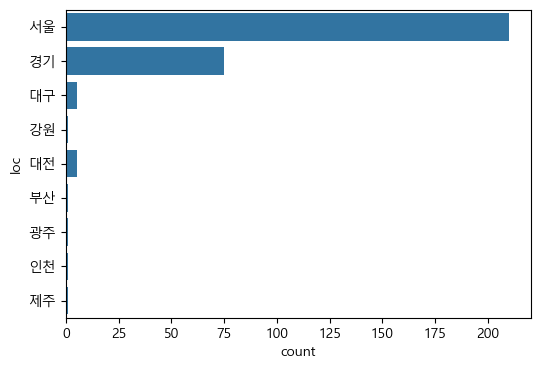

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(jumpit['loc'])

plt.show()

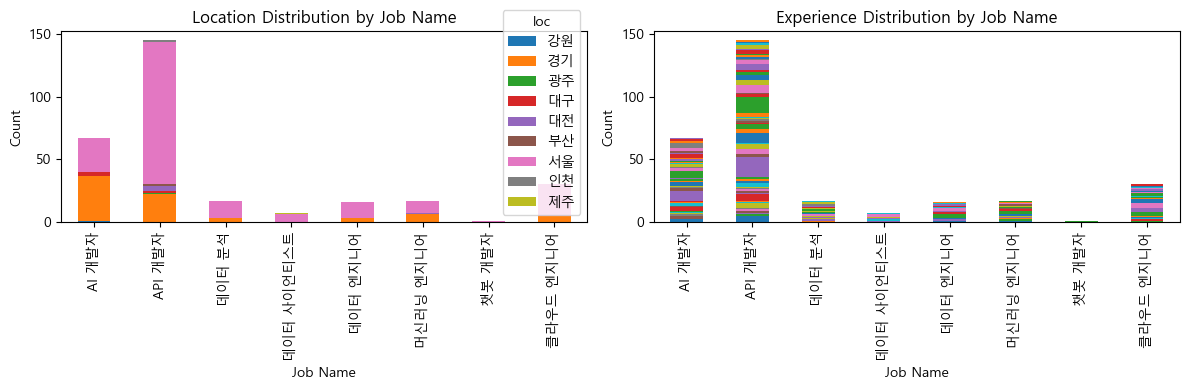

In [44]:
plt.figure(figsize=(12, 4))

# 1. Job Name 별 지역(loc) 분포
plt.subplot(1, 2, 1)
loc_dist = jumpit.groupby('job_name')['loc'].value_counts().unstack().fillna(0)
loc_dist.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Location Distribution by Job Name')
plt.xlabel('Job Name')
plt.ylabel('Count')

# 2. Job Name 별 경험(exp) 분포
plt.subplot(1, 2, 2)
exp_dist = jumpit.groupby('job_name')['exp'].value_counts().unstack().fillna(0)
exp_dist.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Experience Distribution by Job Name')
plt.xlabel('Job Name')
plt.ylabel('Count')
plt.gca().get_legend().set_visible(False)

plt.tight_layout()
plt.show()


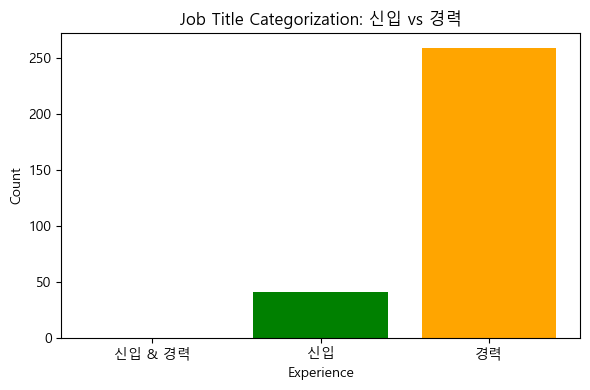

In [41]:
# 신입과 경력 포함 여부를 분리
newbie = jumpit[jumpit['exp'].str.contains('신입', na=False)]
experienced = jumpit[jumpit['exp'].str.contains('경력', na=False)] 

# 신입과 경력이 둘 다 포함된 직무
both = newbie[newbie['exp'].str.contains('경력', na=False)]

# 신입만 포함된 직무 (신입이 포함되고 경력은 포함되지 않음)
only_newbie = newbie[~newbie['exp'].str.contains('경력', na=False)]

# 경력만 포함된 직무 (경력이 포함되고 신입은 포함되지 않음)
only_experienced = experienced[~experienced['exp'].str.contains('신입', na=False)]

# 각 카운트
counts = {
    '신입 & 경력': both.shape[0],
    '신입': only_newbie.shape[0],
    '경력': only_experienced.shape[0]
}

# 시각화
plt.figure(figsize=(6, 4))
plt.bar(counts.keys(), counts.values(), color=['blue', 'green', 'orange'])
plt.title('Job Title Categorization: 신입 vs 경력')
plt.xlabel('Experience')
plt.ylabel('Count')
plt.tight_layout()
plt.show()